In [25]:
#Libraries for data Manipulation
import numpy as np  # linear algebra
import pandas as pd  #  data  processing,  CSV  file  I/O  (e.g. pd.read_csv)
import seaborn as sns

#Libraries for Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
 
# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
 
# linear regression 
from sklearn import linear_model 


# libraries for plotting of residual plots
import statsmodels.api as sm  
from  statsmodels.formula.api  import  ols 

# Task 2

# The data "Student Performance Data Set" approach student achievement in secondary education of two Portuguese schools.

In [26]:
Student_mat = pd.read_csv("student-mat.csv", sep = ';') 
# standard statistical measures 
Student_mat.describe(percentiles = [.25, .5, .75, .90 ,.95, .99]) 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
90%,18.000000,4.000000,4.000000,2.000000,3.000000,1.000000,5.000000,4.600000,5.000000,3.000000,4.000000,5.000000,14.000000,16.000000,15.000000,15.600000
95%,19.000000,4.000000,4.000000,3.000000,4.000000,2.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,18.300000,16.000000,16.300000,17.000000
99%,20.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,38.120000,18.000000,18.000000,19.000000


# The features about: age, Medu, Fedu, traveltime, studytime, failures, famrel,freetime, goout, Dalc, Walc, health, absences, G1, G2, G3

In [7]:
# quick view of columns and values 
Student_mat.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
#How many features (attributes) 
len(Student_mat.columns) 

33

In [9]:
#What data types are these
Student_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Provide summary statistics of the continuous numerical features

<AxesSubplot:xlabel='G3', ylabel='Count'>

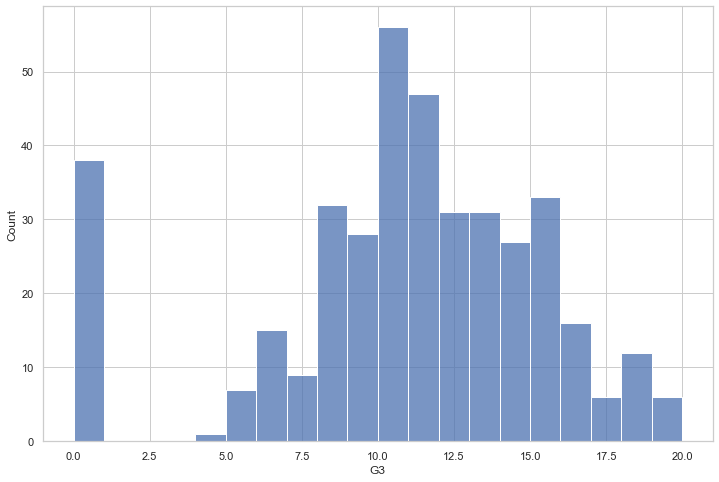

In [10]:
sns.set_theme ( style= "whitegrid")
plt.figure ( figsize= (12,8)) 
sns.histplot( data= Student_mat.G3  , bins = 20 , binwidth= 1 , binrange=  ( 0,20))

# Illustrate the features of your dataset using meaningful boxplots

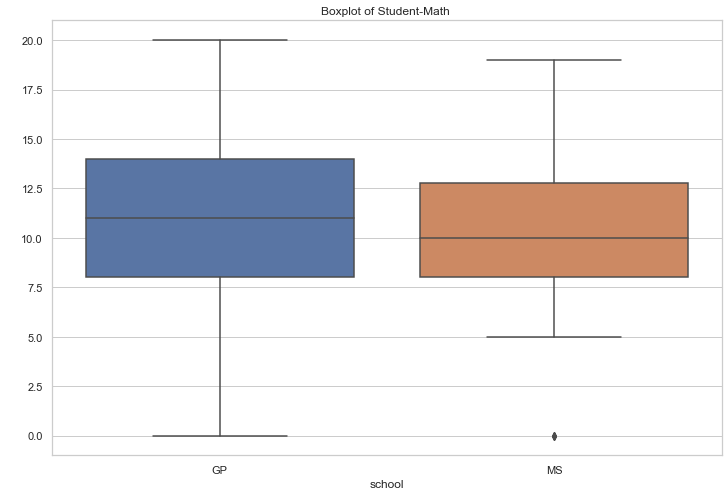

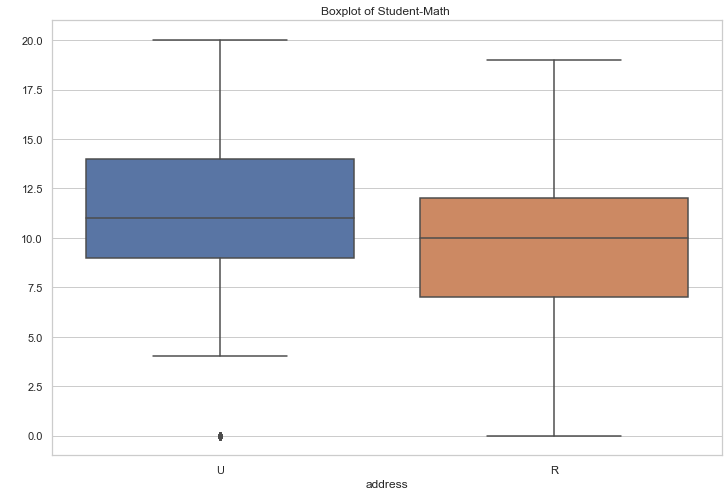

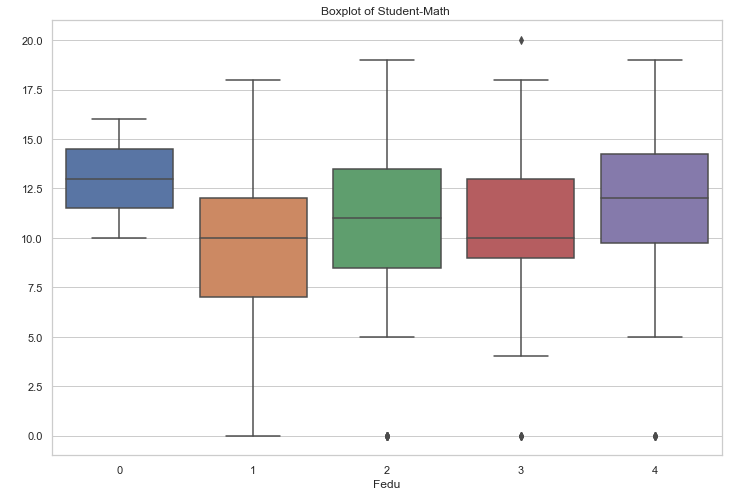

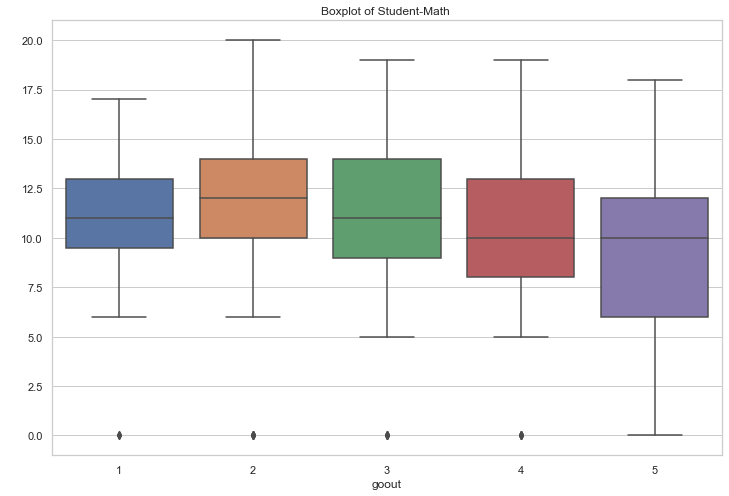

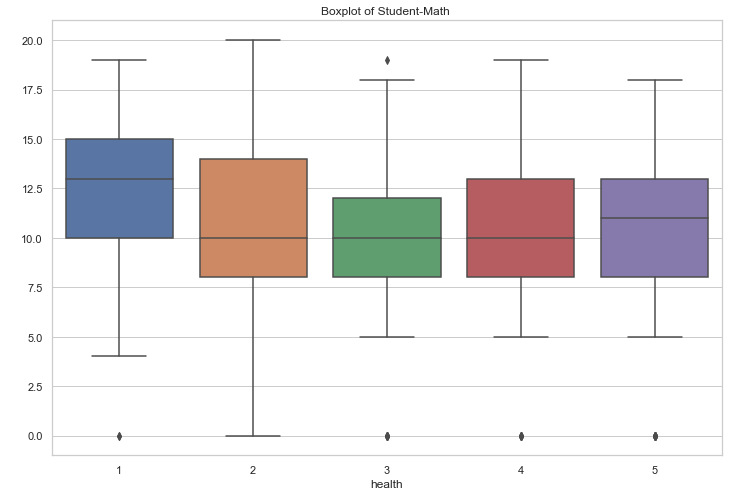

In [11]:
for a  in ["school" ,"address", "Fedu" , "goout" , "health"]:
    plt.figure ( figsize= (12,8)) 
    sns.boxplot ( data = Student_mat  , x = a  , y = 'G3')
    plt.title ("Boxplot of Student-Math ")
    plt.ylabel ( " ") 

# Histograms

# grouped scatter plots 

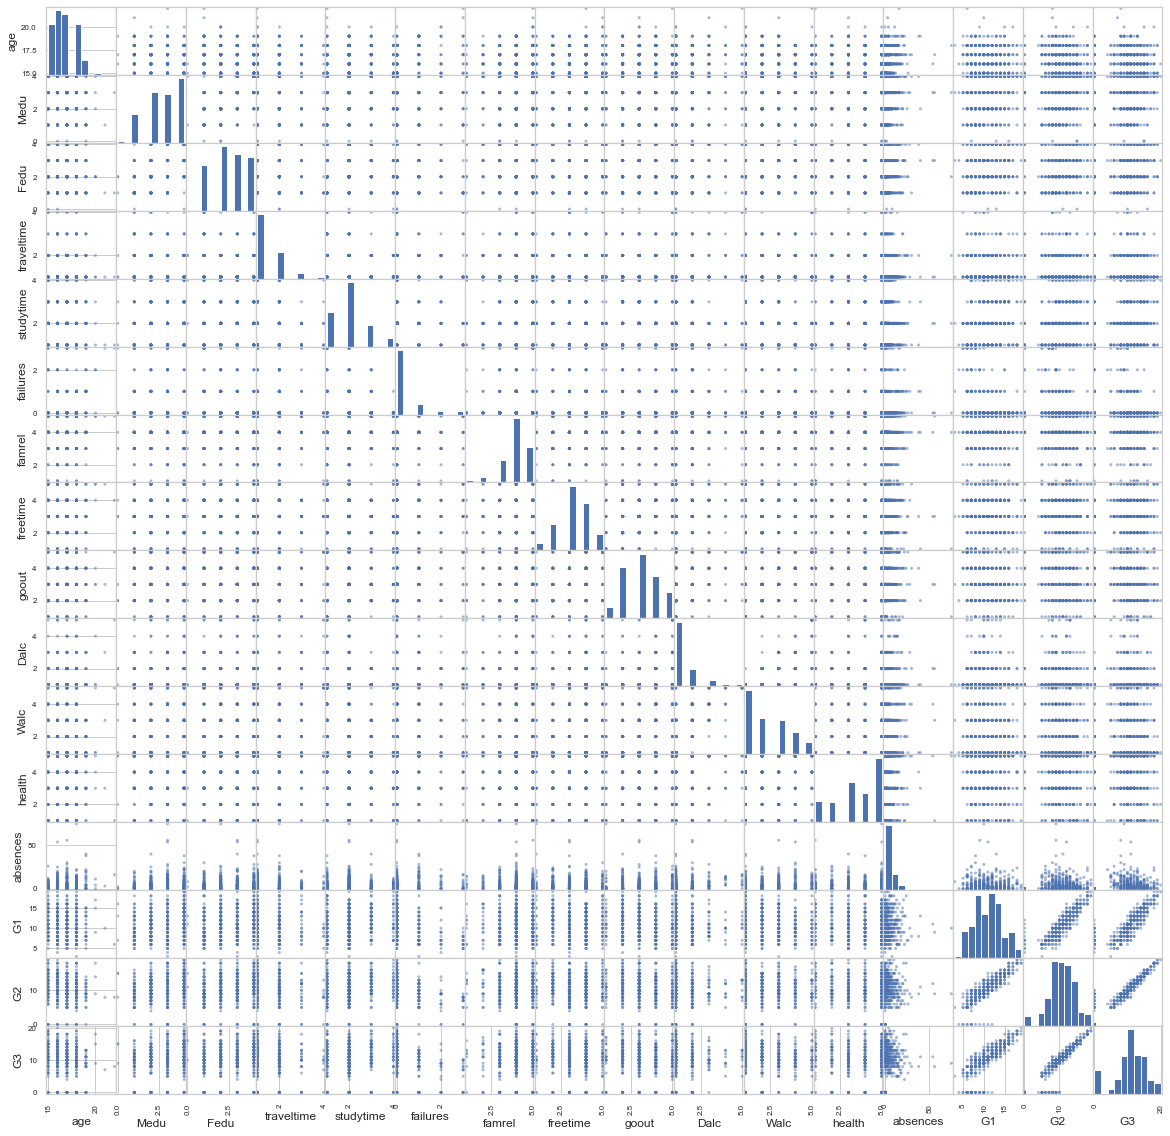

In [12]:
pd.plotting.scatter_matrix(Student_mat,figsize=[20,20]) 
plt.show() 

# Task 3

# Correlation matrixes and plots

<AxesSubplot:>

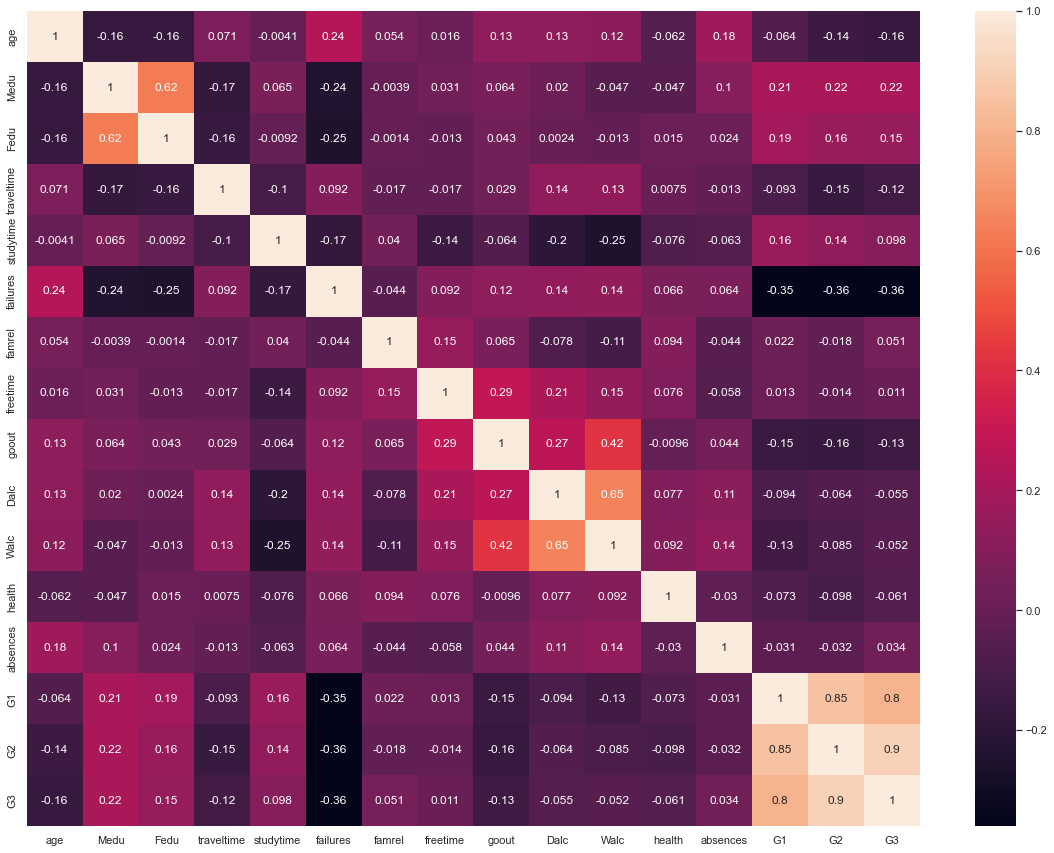

In [13]:
# pearson  ( plot corr )
plt.figure(figsize=(20,15)) 
sns.heatmap(Student_mat.corr(method='pearson', min_periods=1),annot=True)

In [14]:
Student_mat.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


<AxesSubplot:>

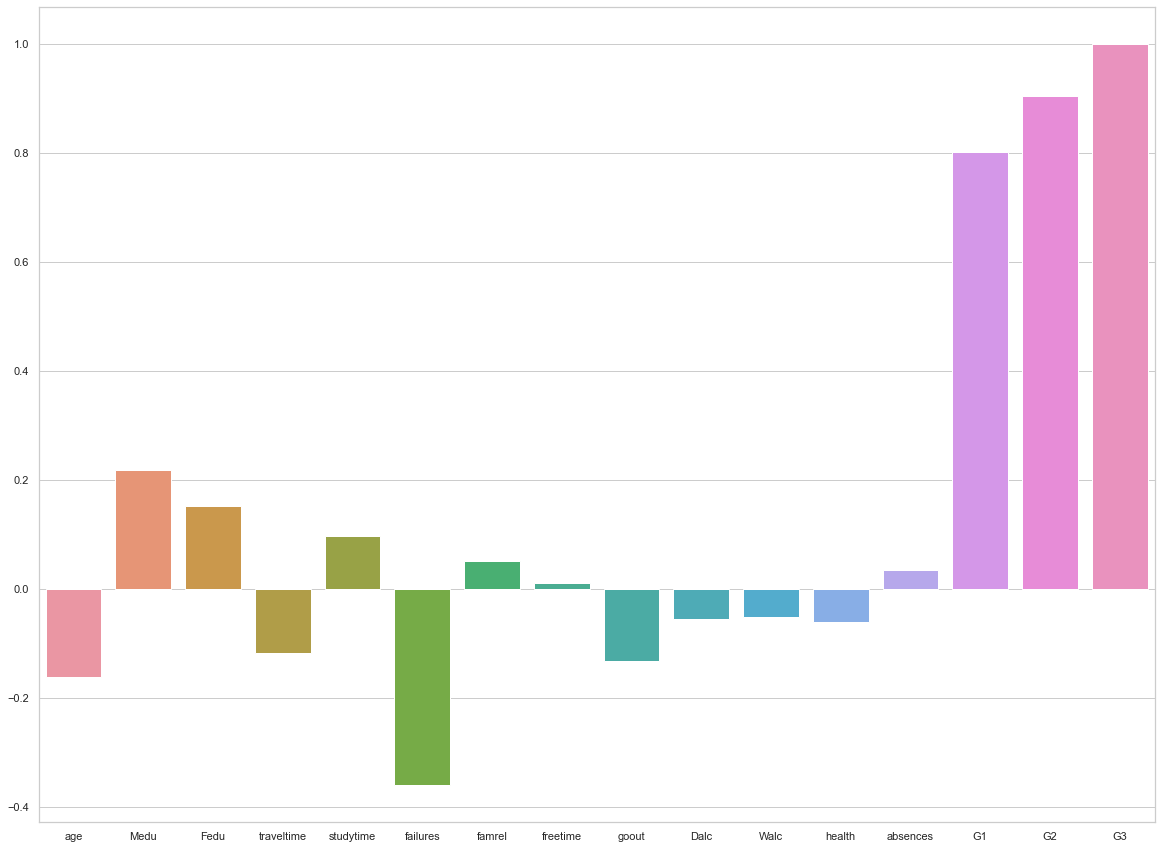

In [15]:
# correlation between independent variables and dependent variables
plt.figure(figsize=(20,15)) 
sns.barplot (   x  = Student_mat.corr()["G3"].index   , y = Student_mat.corr()["G3"].values   ) 


In [16]:
Student_mat.corr()["G3"].index

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1776.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          7.63e-148
Time:                        17:14:42   Log-Likelihood:                -823.83
No. Observations:                 395   AIC:                             1652.
Df Residuals:                     393   BIC:                             1660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3928      0.297     -4.690      0.0

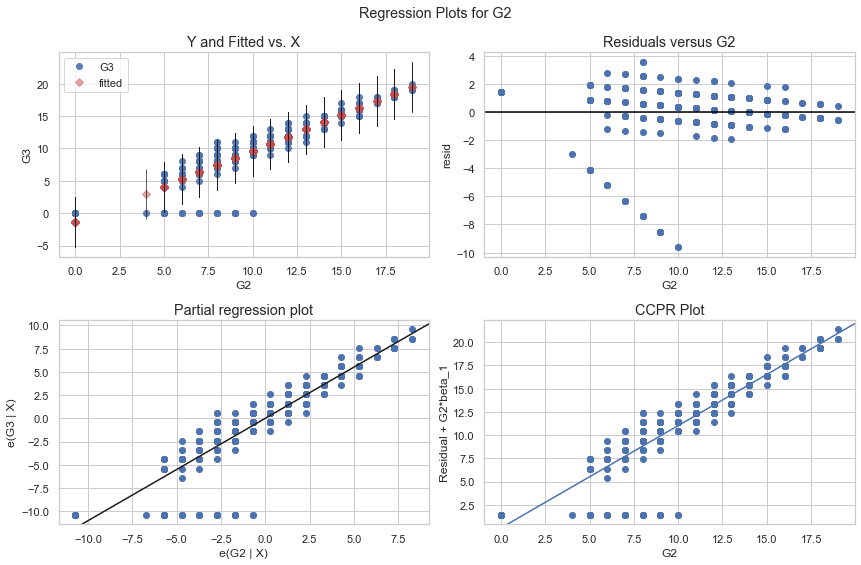

In [17]:
model = ols('G3 ~ G2', data=Student_mat).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'G2', fig=fig) 

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     58.67
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           1.47e-13
Time:                        17:14:44   Log-Likelihood:                -1133.7
No. Observations:                 395   AIC:                             2271.
Df Residuals:                     393   BIC:                             2279.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1572      0.236     47.259      0.0

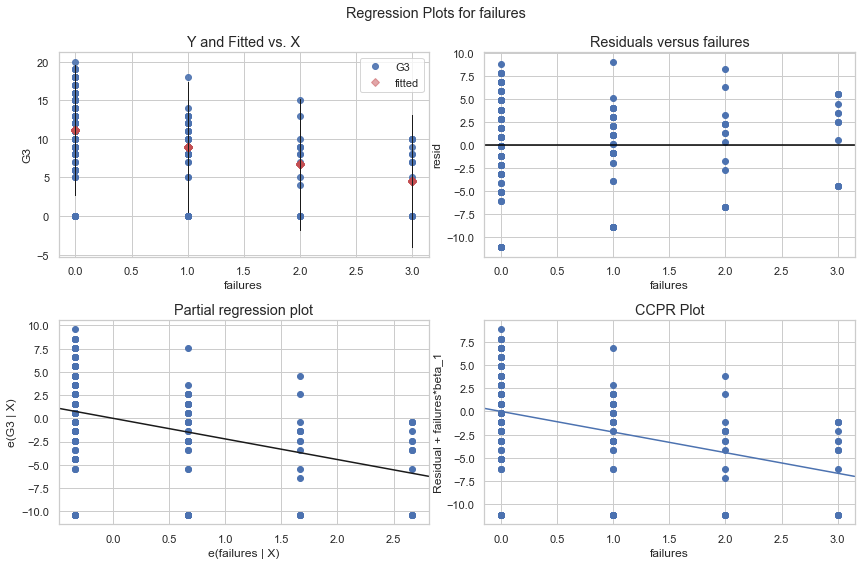

In [18]:
reg = linear_model.LinearRegression()#linear regression class object 
# test Medu vs G3
model = ols('G3 ~ failures', data=Student_mat).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'failures', fig=fig) 

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     19.45
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           1.34e-05
Time:                        17:14:45   Log-Likelihood:                -1151.6
No. Observations:                 395   AIC:                             2307.
Df Residuals:                     393   BIC:                             2315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9167      0.610     12.984      0.0

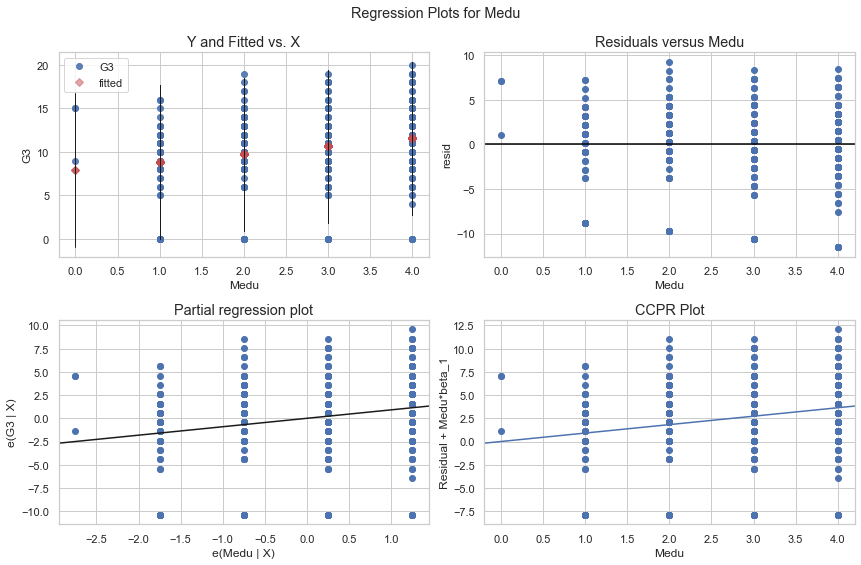

In [19]:
reg = linear_model.LinearRegression()#linear regression class object 
# test Medu vs G3
model = ols('G3 ~ Medu', data=Student_mat).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'Medu', fig=fig) 

# Task 4

In [20]:
# chọn các biến : chạy mô hình Ols để xem có phù hợp ko ( điều kiện đầu thì corr() sẽ nhỏ hơn 0,7)

#  Check biến


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     9.352
Date:                Fri, 08 Apr 2022   Prob (F-statistic):            0.00238
Time:                        17:14:47   Log-Likelihood:                -1156.5
No. Observations:                 395   AIC:                             2317.
Df Residuals:                     393   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7967      0.576     15.264      0.0

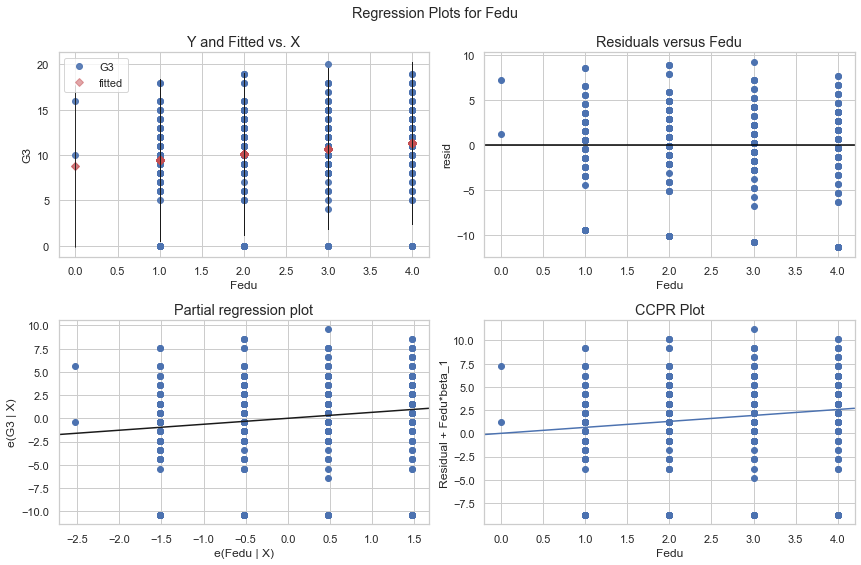

In [21]:

# test Fedu vs G3
model = ols('G3 ~ Fedu', data=Student_mat).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'Fedu', fig=fig)  

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     7.054
Date:                Fri, 08 Apr 2022   Prob (F-statistic):            0.00823
Time:                        17:14:48   Log-Likelihood:                -1157.7
No. Observations:                 395   AIC:                             2319.
Df Residuals:                     393   BIC:                             2327.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1141      0.679     17.833      0.0

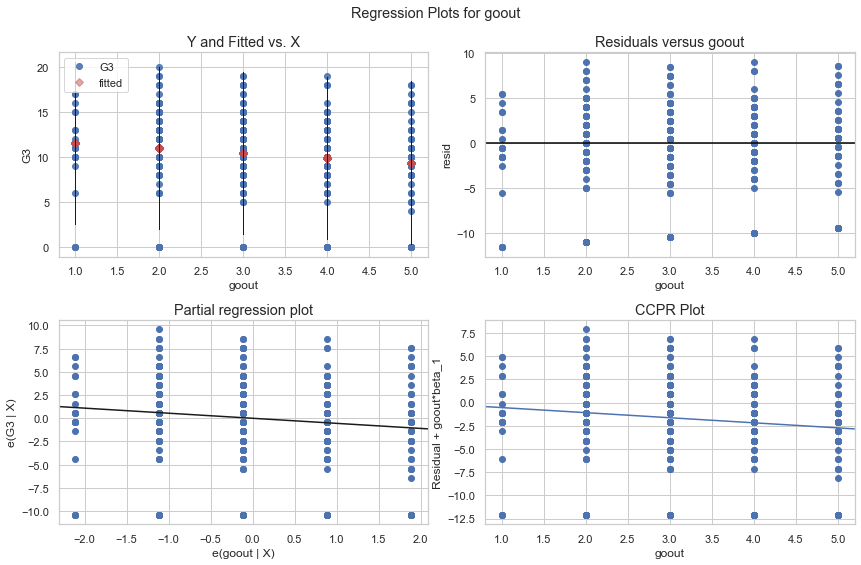

In [22]:

# test goout vs G3
model = ols('G3 ~ goout', data=Student_mat).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'goout', fig=fig)  

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     58.67
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           1.47e-13
Time:                        17:14:50   Log-Likelihood:                -1133.7
No. Observations:                 395   AIC:                             2271.
Df Residuals:                     393   BIC:                             2279.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1572      0.236     47.259      0.0

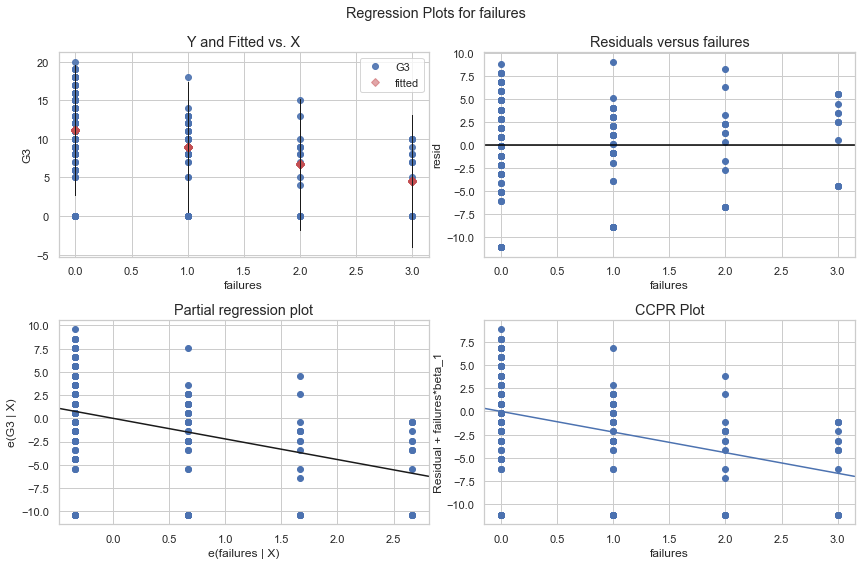

In [23]:

# test failures vs G3
model = ols('G3 ~ failures', data=Student_mat).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'failures', fig=fig)   

In [24]:
# regression results, statistical significance metrics
reg = linear_model.LinearRegression()
reg.fit( Student_mat[['Fedu' , 'Medu' , 'goout' , 'failures' ]] , Student_mat['G3'])
print( reg.score(Student_mat[['Fedu' , 'Medu' , 'goout' , 'failures' ]] , Student_mat['G3'])  ) # R_score
#print( reg.coef_ ) 
#print( reg.intercept_  ) 
# Print(f"The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0]}*Fedu + {reg.coef_[1]}*Medu  + {reg.coef_[2]}*failures  + {reg.coef_[3]}*G2")
print (f"The multi linear model is: \n Y = {reg.intercept_} + {reg.coef_[0]}*Fedu + {reg.coef_[1]}*Medu  +  {reg.coef_[2]}*goout + {reg.coef_[3]}*failures ")

0.15912689059852103
The multi linear model is: 
 Y = 10.748925127856744 + -0.10313061923537098*Fedu + 0.6885387736996549*Medu  +  -0.424172439470286*goout + -1.9392172826765015*failures 


In [ ]:
#coefficients tables
Model = ols('G3 ~ Medu+Fedu+goout+failures', data=Student_mat).fit()
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     18.45
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           6.73e-14
Time:                        11:27:53   Log-Likelihood:                -1126.9
No. Observations:                 395   AIC:                             2264.
Df Residuals:                     390   BIC:                             2284.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7489      0.847     12.685      0.0

In [ ]:
#coefficients tables
coef = pd.read_html(Model.summary2().as_html())[1]
coef[1:][[0,1]].rename ( columns = {0:"variable" , 1 : "value"})

,variable,value
1,Intercept,10.7489
2,Medu,0.6885
3,Fedu,-0.1031
4,goout,-0.4242
5,failures,-1.9392


mo hình này có  --  Fedu          -P>|t| cao hoqn 0.05 ==> k có ý nghĩa thông kế